<a href="https://colab.research.google.com/github/siddharth0517/Customer-Churn-Prediction-using-KNN-Classifier/blob/main/Customer_Churn_Prediction_using_KNN_Classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Customer Churn Prediction using KNN Classifier

**1. Importing Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**2. Importing Dataset**

In [2]:
Dataset = pd.read_csv('Churn_Modelling.csv')

Dataset.isnull().sum()


,0
CustomerID,1
Age,1
Gender,1
Tenure,1
Usage Frequency,1
Support Calls,1
Payment Delay,1
Subscription Type,1
Contract Length,1
Total Spend,1


In [3]:
Dataset.dropna(inplace=True)

In [4]:
X = Dataset.iloc[:, 3:-1]
y = Dataset.iloc[:, -1]

In [5]:
print(X)

        Tenure  Usage Frequency  Support Calls  Payment Delay  \
0         39.0             14.0            5.0           18.0   
1         49.0              1.0           10.0            8.0   
2         14.0              4.0            6.0           18.0   
3         38.0             21.0            7.0            7.0   
4         32.0             20.0            5.0            8.0   
...        ...              ...            ...            ...   
440828    54.0             15.0            1.0            3.0   
440829     8.0             13.0            1.0           20.0   
440830    35.0             27.0            1.0            5.0   
440831    55.0             14.0            2.0            0.0   
440832    48.0             20.0            1.0           14.0   

       Subscription Type Contract Length  Total Spend  Last Interaction  
0               Standard          Annual       932.00              17.0  
1                  Basic         Monthly       557.00               6.0

**3. Encoding Categorical Data**

In [7]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [4,5])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

**4. Splitting Dataset**

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=0)

**5. Feature Scaling**

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

**6. Model Building**

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5,metric='minkowski',p=2)
classifier.fit(X_train,y_train)

KNeighborsClassifier()

**7. Model Prediction**

In [11]:
y_pred = classifier.predict(X_test)

**8. Model Evaluation**

In [12]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[37173   867]
 [ 5152 44975]]


0.9317318271008427

<Axes: >

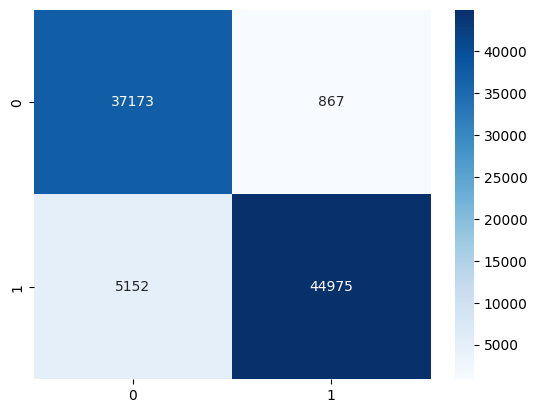

In [13]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')